### <center> Practical 1 : Machine Learning </center>
##### <center> 190220131124 </center>
<b> Aim </b> <hr>
Perform the following data pre-processing techniques in python. Use Pima Indian dataset. <br>
I.	Implement the techniques of Data Cleaning in python. <br>
II.	Implement the techniques of Data Transformation in python. <br>
III.Implement the techniques of Data Reduction in python.<br>
IV.	Implement the techniques of Dimensionality Reduction in python.<br>
V.	Implement the techniques for feature subset selection.<br>


<b>Code </b>
<hr>

#####  Basic Library import

%pip install pandas <br>
%pip install numpy <br>
%pip install -U scikit-learn <br>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#####  Data Loading

In [2]:
data_set = pd.read_csv('diabetes.csv');

In [3]:
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_set.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### Data Cleaning

Data cleaning means fixing bad data in your data set. <br>
Bad data could be:
* Empty cells
* Data in wrong format
* Wrong data
* Duplicates


 Empty data cell

In [7]:
data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 There is no null column, so we dont need to perfom any operation

 Duplicates

In [8]:
data_set.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

 There is no duplicate row, so we dont need to perfom any operation

##### Data Transforming

In [9]:
data_set.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data_set.rename(columns={'DiabetesPedigreeFunction': 'DBPFunction'},inplace=True)

In [11]:
data_set.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DBPFunction', 'Age', 'Outcome'],
      dtype='object')

 Getting data in Range 


In [12]:
replacement = []
for col in data_set.columns:
    Q1 = data_set[col].quantile(0.25)
    Q3 = data_set[col].quantile(0.75)
    IQR = Q3-Q1
    lower_tail = Q1 - 1.5 * IQR
    upper_tail = Q3 + 1.5 * IQR 
    Median =  np.median(data_set[col])
    count = 0
    for val in data_set[col]:
        if (val < lower_tail or val > upper_tail ): 
            count = count + 1
            data_set[col] = data_set[col].replace(val,Median);
    replacement.append(count)

colindx = 0
for col in data_set.columns:
    print("Replacement Done at ", col,"= ", replacement[colindx])
    colindx = colindx + 1

Replacement Done at  Pregnancies =  4
Replacement Done at  Glucose =  5
Replacement Done at  BloodPressure =  45
Replacement Done at  SkinThickness =  1
Replacement Done at  Insulin =  34
Replacement Done at  BMI =  19
Replacement Done at  DBPFunction =  29
Replacement Done at  Age =  9
Replacement Done at  Outcome =  0


In [13]:
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBPFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.6270,50,1
1,1,85,66,29,0.0,26.6,0.3510,31,0
2,8,183,64,0,0.0,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

##### Data Scaling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [18]:
print("x_train shape : ", x_train.shape)
print("x_test shape  : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape  : ",y_test.shape)

x_train shape :  (614, 8)
x_test shape  :  (154, 8)
y_train shape :  (614,)
y_test shape  :  (154,)


In [19]:
from sklearn.preprocessing import StandardScaler 

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [21]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

##### Feature Extraction

Apply "SelectKBest" class to extract top 8 best features 

In [22]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [23]:
bestfeature = SelectKBest(score_func=chi2, k=8)

In [24]:
fit = bestfeature.fit(x,y)
fit

SelectKBest(k=8, score_func=<function chi2 at 0x000002458ED1CB80>)

In [25]:
dfscores = pd.DataFrame(fit.scores_)
dfscores

,0
0,88.939041
1,1418.442397
2,35.881883
3,41.945879
4,462.472767
5,88.464121
6,2.490278
7,202.251731


In [26]:
dfcolumns = pd.DataFrame(data_set.iloc[:, :-1].columns) 
dfcolumns.head()

,0
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin


In [27]:
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores

,0,0
0,Pregnancies,88.939041
1,Glucose,1418.442397
2,BloodPressure,35.881883
3,SkinThickness,41.945879
4,Insulin,462.472767
5,BMI,88.464121
6,DBPFunction,2.490278
7,Age,202.251731


In [28]:
feature_scores.columns = ['Space', 'Score']

In [29]:
feature_scores

,Space,Score
0,Pregnancies,88.939041
1,Glucose,1418.442397
2,BloodPressure,35.881883
3,SkinThickness,41.945879
4,Insulin,462.472767
5,BMI,88.464121
6,DBPFunction,2.490278
7,Age,202.251731


##### Applying Model

In [30]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 

In [31]:
Model = ExtraTreesClassifier()

In [32]:
Model.fit(x,y)

ExtraTreesClassifier()

In [33]:
Model.feature_importances_

array([0.10724569, 0.23165858, 0.10407736, 0.08263633, 0.07017332,
       0.14450936, 0.11469903, 0.14500032])

In [34]:
feat_importances = pd.Series(Model.feature_importances_, index=data_set.iloc[:, :-1].columns)
feat_importances

Pregnancies      0.107246
Glucose          0.231659
BloodPressure    0.104077
SkinThickness    0.082636
Insulin          0.070173
BMI              0.144509
DBPFunction      0.114699
Age              0.145000
dtype: float64

<AxesSubplot: >

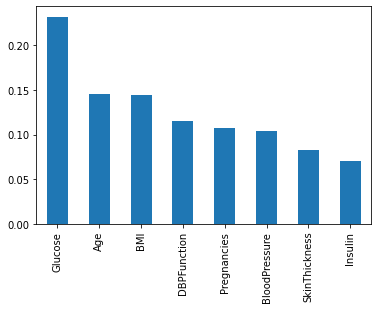

In [35]:
## Visulazing the Feature Importance 
feat_importances.nlargest(8).plot(kind='bar')
